In [ ]:
#Question A

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.utils import resample

In [ ]:
sales_path = 'F:/uni-arshad/CRM/HWS/hw3/sales_data.csv'
time_path = 'F:/uni-arshad/CRM/HWS/hw3/time_data.csv'
sales_data = pd.read_csv(sales_path)
time_data = pd.read_csv(time_path)

In [ ]:
sales_data.head()

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales
0,9,77,848,19,8.40,2.688,3
1,9,1346,1013,19,7.05,2.256,3
2,9,293,848,19,4.80,1.632,3
3,9,603,848,19,3.69,1.734,3
4,9,87,848,19,5.34,2.456,3


In [ ]:
time_data.head()

,time_id,the_date,the_day,the_month,the_year,day_of_month,week_of_year,month_of_year,quarter
0,367,1/1/1997 0:00,Wednesday,January,1997,1,2,1,Q1
1,368,1/2/1997 0:00,Thursday,January,1997,2,2,1,Q1
2,369,1/3/1997 0:00,Friday,January,1997,3,2,1,Q1
3,370,1/4/1997 0:00,Saturday,January,1997,4,2,1,Q1
4,371,1/5/1997 0:00,Sunday,January,1997,5,3,1,Q1


In [ ]:
def periodCalc(y, m):
    if y == 1998:
        return 13 - m
    else:
        return 25 - m

In [ ]:
time_data['period'] = time_data.apply(lambda x: periodCalc(x['the_year'], x['month_of_year']), axis =1)

In [ ]:
time_data

,time_id,the_date,the_day,the_month,the_year,day_of_month,week_of_year,month_of_year,quarter,period
0,367,1/1/1997 0:00,Wednesday,January,1997,1,2,1,Q1,24
1,368,1/2/1997 0:00,Thursday,January,1997,2,2,1,Q1,24
2,369,1/3/1997 0:00,Friday,January,1997,3,2,1,Q1,24
3,370,1/4/1997 0:00,Saturday,January,1997,4,2,1,Q1,24
4,371,1/5/1997 0:00,Sunday,January,1997,5,3,1,Q1,24
...,...,...,...,...,...,...,...,...,...,...
725,1092,12/27/1998 0:00,Sunday,December,1998,27,4,12,Q4,1
726,1093,12/28/1998 0:00,Monday,December,1998,28,4,12,Q4,1
727,1094,12/29/1998 0:00,Tuesday,December,1998,29,4,12,Q4,1
728,1095,12/30/1998 0:00,Wednesday,December,1998,30,4,12,Q4,1


In [ ]:
sales_data_merged = pd.merge(sales_data, time_data[['time_id', 'period']], left_on='time_id', right_on='time_id', how='inner')

In [ ]:
sales_data_merged

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period
0,9,77,848,19,8.40,2.688,3,9
1,9,293,848,19,4.80,1.632,3,9
2,9,603,848,19,3.69,1.734,3,9
3,9,87,848,19,5.34,2.456,3,9
4,9,573,848,19,6.78,2.576,2,9
...,...,...,...,...,...,...,...,...
32945,9898,420,513,15,6.81,2.588,3,20
32946,9898,537,513,15,7.95,2.942,3,20
32947,9898,1206,513,15,10.29,4.219,3,20
32948,9898,25,513,15,4.65,2.325,3,20


In [ ]:
def clvCalc(R, C, i):
    return ((R - C) / (1 + 0.2) ** (i - 0.5))

In [ ]:
sales_data_merged['clv'] = sales_data_merged.apply(lambda x: clvCalc(x['store_sales'], x['store_cost'], x['period']), axis =1)
sales_data_merged

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period,clv
0,9,77,848,19,8.40,2.688,3,9,1.212684
1,9,293,848,19,4.80,1.632,3,9,0.672581
2,9,603,848,19,3.69,1.734,3,9,0.415268
3,9,87,848,19,5.34,2.456,3,9,0.612286
4,9,573,848,19,6.78,2.576,2,9,0.892529
...,...,...,...,...,...,...,...,...,...
32945,9898,420,513,15,6.81,2.588,3,20,0.120638
32946,9898,537,513,15,7.95,2.942,3,20,0.143097
32947,9898,1206,513,15,10.29,4.219,3,20,0.173471
32948,9898,25,513,15,4.65,2.325,3,20,0.066434


In [ ]:
clv_per_customer = sales_data_merged.groupby('customer_id')['clv'].sum().reset_index(name='clv_sum')
clv_per_customer

,customer_id,clv_sum
0,9,24.543266
1,20,73.136424
2,23,7.712283
3,25,16.499381
4,40,0.314405
...,...,...
1018,10234,27.216820
1019,10244,20.457120
1020,10256,0.883718
1021,10258,21.759489


In [ ]:
CE = clv_per_customer['clv_sum'].sum()
CE

41145.94698528077

In [ ]:
#Question B

In [ ]:
clv_per_customer['clv_percentage'] = clv_per_customer.apply(lambda x: (x['clv_sum'] / CE) * 100, axis =1)
clv_per_customer

,customer_id,clv_sum,clv_percentage
0,9,24.543266,0.059649
1,20,73.136424,0.177749
2,23,7.712283,0.018744
3,25,16.499381,0.040100
4,40,0.314405,0.000764
...,...,...,...
1018,10234,27.216820,0.066147
1019,10244,20.457120,0.049718
1020,10256,0.883718,0.002148
1021,10258,21.759489,0.052884


In [ ]:
clv_per_customer = clv_per_customer.sort_values(by=['clv_percentage'], ascending=True)
clv_per_customer

,customer_id,clv_sum,clv_percentage
435,4245,0.012096,0.000029
408,3940,0.051133,0.000124
1007,10094,0.059489,0.000145
172,1621,0.083745,0.000204
429,4183,0.108954,0.000265
...,...,...,...
78,850,372.660364,0.905704
485,4853,376.943752,0.916114
787,7836,378.769782,0.920552
465,4579,386.888700,0.940284


In [ ]:
clv_per_customer['clv_cumpercentage'] = clv_per_customer['clv_percentage'].cumsum()
clv_per_customer

,customer_id,clv_sum,clv_percentage,clv_cumpercentage
435,4245,0.012096,0.000029,0.000029
408,3940,0.051133,0.000124,0.000154
1007,10094,0.059489,0.000145,0.000298
172,1621,0.083745,0.000204,0.000502
429,4183,0.108954,0.000265,0.000767
...,...,...,...,...
78,850,372.660364,0.905704,96.079462
485,4853,376.943752,0.916114,96.995576
787,7836,378.769782,0.920552,97.916128
465,4579,386.888700,0.940284,98.856411


In [ ]:
pareto_principle_customers = clv_per_customer[clv_per_customer["clv_cumpercentage"] >= 80]
pareto_principle_customers

,customer_id,clv_sum,clv_percentage,clv_cumpercentage
834,8363,216.270002,0.525617,80.457620
492,4925,217.351913,0.528246,80.985866
384,3761,226.066824,0.549427,81.535293
368,3661,226.495934,0.550470,82.085763
670,6679,227.730826,0.553471,82.639234
853,8498,241.157817,0.586103,83.225337
130,1284,249.102099,0.605411,83.830748
247,2310,252.848587,0.614516,84.445264
855,8511,255.453046,0.620846,85.066111
132,1297,259.921235,0.631706,85.697816


In [ ]:
pareto_principle_customers = pareto_principle_customers.sample(frac=0.20)
pareto_principle_customers

,customer_id,clv_sum,clv_percentage,clv_cumpercentage
492,4925,217.351913,0.528246,80.985866
649,6394,274.007445,0.665940,88.969953
323,3125,289.478660,0.703541,90.342173
331,3210,265.665962,0.645667,86.983288
670,6679,227.730826,0.553471,82.639234
132,1297,259.921235,0.631706,85.697816


In [ ]:
pareto_principle_customers_sales_info = pd.merge(pareto_principle_customers, sales_data_merged, on='customer_id', how='left')
pareto_principle_customers_sales_info

,customer_id,clv_sum,clv_percentage,clv_cumpercentage,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period,clv
0,4925,217.351913,0.528246,80.985866,811,968,16,5.94,2.138,2,5,1.673773
1,4925,217.351913,0.528246,80.985866,1093,968,16,5.62,2.192,2,5,1.509125
2,4925,217.351913,0.528246,80.985866,245,968,16,4.47,2.101,3,5,1.042916
3,4925,217.351913,0.528246,80.985866,538,968,16,3.72,1.674,4,5,0.900720
4,4925,217.351913,0.528246,80.985866,1181,968,16,7.08,2.832,4,5,1.870118
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1297,259.921235,0.631706,85.697816,670,441,16,7.16,2.291,4,22,0.096615
1046,1297,259.921235,0.631706,85.697816,654,441,16,8.68,3.646,4,22,0.099889
1047,1297,259.921235,0.631706,85.697816,1437,969,16,5.22,2.192,3,5,1.333031
1048,1297,259.921235,0.631706,85.697816,62,969,16,15.28,7.029,4,5,3.632378


In [ ]:
customer_path = 'F:/uni-arshad/CRM/HWS/hw3/customer_data.csv'
customer_data = pd.read_csv(customer_path)
customer_data.head()

,customer_id,account_num,lname,fname,mi,address1,city,state_province,postal_code,country,...,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,fullname
0,9,87544797658,Blumberg,Brenda,C.,7560 Trees Drive,Richmond,BC,17256,Canada,...,M,5,3,Partial High School,11/14/1993 0:00,Normal,Skilled Manual,Y,1,Brenda Blumberg
1,20,87653979700,Baker,Beverly,NaN,591 Merriewood Drive,Spring Valley,CA,88762,USA,...,F,2,0,Partial High School,4/2/1993 0:00,Normal,Manual,Y,2,Beverly Baker
2,23,87678398489,Wyro,Shauna,K.,3114 Notre Dame Ave.,La Jolla,CA,27430,USA,...,F,2,0,High School Degree,8/12/1992 0:00,Silver,Manual,N,3,Shauna Wyro
3,25,87686740159,Conley,Lin,N.,7814 Milburn Dr.,Haney,BC,65710,Canada,...,F,3,0,High School Degree,11/18/1991 0:00,Bronze,Professional,N,2,Lin Conley
4,40,87814209461,Burchett,Phyllis,NaN,475 Santa Maria,Santa Cruz,CA,49192,USA,...,M,1,0,Partial College,8/14/1992 0:00,Bronze,Professional,Y,2,Phyllis Burchett


In [ ]:
product_path = 'F:/uni-arshad/CRM/HWS/hw3/product_data.csv'
product_data = pd.read_csv(product_path)
product_data.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.900000,12.60,7.400000
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.400000,3.71,22.600000
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.400000,11.00,7.770000
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.900000,18.90,7.930000
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.700001,21.90,19.200001


In [ ]:
store_path = 'F:/uni-arshad/CRM/HWS/hw3/store_data.csv'
store_data = pd.read_csv(store_path)
store_data.head()

,store_id,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date
0,0,HeadQuarters,0,HQ,0,1 Alameda Way,Alameda,CA,55555,USA,NaN,NaN,NaN,NaN,NaN
1,1,Supermarket,28,Store 1,1,2853 Bailey Rd,Acapulco,Guerrero,55555,Mexico,Jones,262-555-5124,262-555-5121,1/9/1982 0:00,12/5/1990 0:00
2,2,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,4/2/1970 0:00,6/4/1973 0:00
3,3,Supermarket,76,Store 3,3,1501 Ramsey Circle,Bremerton,WA,55555,USA,Davis,509-555-1596,509-555-1591,6/14/1959 0:00,11/19/1967 0:00
4,4,Gourmet Supermarket,27,Store 4,4,433 St George Dr,Camacho,Zacatecas,55555,Mexico,Johnson,304-555-1474,304-555-1471,9/27/1994 0:00,12/1/1995 0:00


In [ ]:
pareto_principle_customers_info = pd.merge(customer_data, pareto_principle_customers[['customer_id']],
                                           on='customer_id', how='inner')
pareto_principle_customers_info

,customer_id,account_num,lname,fname,mi,address1,city,state_province,postal_code,country,...,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,fullname
0,1297,12041890621,Mramor,Joann,NaN,2696 Santa Rita Dr.,Spokane,WA,72551,USA,...,M,4,0,High School Degree,11/19/1991 0:00,Bronze,Manual,N,1,Joann Mramor
1,3125,25032547700,Cervantes,Nicola,NaN,442 Westcliffe Place,Merida,Yucatan,46213,Mexico,...,M,5,0,Bachelors Degree,8/21/1992 0:00,Silver,Management,Y,4,Nicola Cervantes
2,3210,25624554157,Ramey,Barbara,D.,5100 Garwood Ct,Hidalgo,Zacatecas,57930,Mexico,...,M,2,0,High School Degree,11/17/1992 0:00,Golden,Skilled Manual,N,2,Barbara Ramey
3,4925,38560950160,Brubaker,Christine,A.,174 MacArthur Avenue,Spokane,WA,62999,USA,...,F,0,0,Bachelors Degree,10/8/1992 0:00,Bronze,Professional,Y,1,Christine Brubaker
4,6394,50563170300,Armstrong,Jennifer,NaN,P. O. Box # 9257,Merida,Yucatan,26403,Mexico,...,M,3,0,Partial High School,11/3/1992 0:00,Normal,Manual,Y,1,Jennifer Armstrong
5,6679,53065290500,Buenstro,Shaun,NaN,7421 Lavetta Way,Merida,Yucatan,52356,Mexico,...,M,0,0,Partial High School,5/25/1991 0:00,Silver,Professional,Y,2,Shaun Buenstro


In [ ]:
pareto_principle_store_info = pd.merge(store_data, pareto_principle_customers_sales_info[['store_id']],
                                       on='store_id', how='inner')
pareto_principle_store_info = pareto_principle_store_info.drop_duplicates(subset='store_id')
pareto_principle_store_info

,store_id,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date
0,8,Deluxe Supermarket,26,Store 8,8,3173 Buena Vista Ave,Merida,Yucatan,55555,Mexico,Williams,797-555-3417,797-555-3411,9/23/1958 0:00,11/18/1967 0:00
400,12,Deluxe Supermarket,25,Store 12,12,1120 Westchester Pl,Hidalgo,Zacatecas,55555,Mexico,Kalman,151-555-1702,151-555-1701,3/25/1968 0:00,12/18/1993 0:00
513,16,Supermarket,87,Store 16,16,5922 La Salle Ct,Spokane,WA,55555,USA,Mantle,643-555-3645,643-555-3641,8/23/1974 0:00,7/13/1977 0:00
990,18,Mid-Size Grocery,25,Store 18,18,6764 Glen Road,Hidalgo,Zacatecas,55555,Mexico,Brown,528-555-8317,528-555-8311,6/28/1969 0:00,8/30/1975 0:00


In [ ]:
pareto_principle_product_info = pd.merge(product_data, pareto_principle_customers_sales_info[['product_id']],
                                       on='product_id', how='inner')
pareto_principle_product_info = pareto_principle_product_info.drop_duplicates(subset='product_id')
pareto_principle_product_info

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.600000,9.600000,1,0,26,10,22.90,18.900000,7.930000
2,19,6,Washington,Washington Cola,29804642796,1.15,15.800000,13.800000,0,0,14,10,6.42,18.100000,21.299999
3,19,7,Washington,Washington Diet Cola,20191444754,2.61,18.000000,17.000000,1,0,11,7,15.00,16.900000,21.000000
4,30,8,Washington,Washington Orange Juice,89770532250,2.59,8.970000,6.970000,1,0,27,7,7.56,11.800000,8.920000
5,30,9,Washington,Washington Cranberry Juice,49395100474,2.42,7.140000,5.130000,0,0,34,7,18.50,16.100000,14.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,32,1554,CDR,CDR Apple Jam,37740505337,2.54,21.000000,19.000000,1,1,25,8,8.25,18.799999,21.900000
1046,32,1555,CDR,CDR Strawberry Jam,89651774764,2.95,21.700001,18.700001,1,1,18,8,14.20,21.400000,16.000000
1047,33,1557,CDR,CDR Strawberry Preserves,50687324404,1.20,15.400000,13.300000,1,0,15,6,14.10,14.800000,19.299999
1048,53,1558,CDR,CDR Extra Chunky Peanut Butter,84930775761,2.16,11.500000,9.500000,0,1,22,10,7.35,9.290000,12.400000


In [ ]:
#Question C

In [ ]:
sales_data_for_rfm = sales_data_merged
sales_data_for_rfm

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period,clv
0,9,77,848,19,8.40,2.688,3,9,1.212684
1,9,293,848,19,4.80,1.632,3,9,0.672581
2,9,603,848,19,3.69,1.734,3,9,0.415268
3,9,87,848,19,5.34,2.456,3,9,0.612286
4,9,573,848,19,6.78,2.576,2,9,0.892529
...,...,...,...,...,...,...,...,...,...
32945,9898,420,513,15,6.81,2.588,3,20,0.120638
32946,9898,537,513,15,7.95,2.942,3,20,0.143097
32947,9898,1206,513,15,10.29,4.219,3,20,0.173471
32948,9898,25,513,15,4.65,2.325,3,20,0.066434


In [ ]:
customers_R = sales_data_for_rfm.loc[sales_data_for_rfm.groupby('customer_id')['period'].idxmin()]
customers_R = customers_R.rename(columns={'period':'R'})
customers_R

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,R,clv
52,9,1346,1013,19,7.05,2.256,3,3,3.039099
313,20,1241,1037,24,8.94,4.202,3,2,3.604319
678,23,1281,859,24,8.31,3.241,3,8,1.291406
774,25,258,1051,19,3.44,1.548,2,2,1.439293
882,40,340,466,14,1.26,0.441,2,21,0.019502
...,...,...,...,...,...,...,...,...,...
23491,10234,1277,1093,6,10.16,4.369,4,1,5.286436
875,10244,1355,1051,19,1.26,0.403,2,2,0.651942
16809,10256,1401,807,6,3.18,1.240,2,10,0.343226
5725,10258,561,1029,15,1.54,0.755,2,3,0.497641


In [ ]:
cols_R = ['customer_id', 'R']
customers_Recency = customers_R[cols_R]
customers_Recency

,customer_id,R
52,9,3
313,20,2
678,23,8
774,25,2
882,40,21
...,...,...
23491,10234,1
875,10244,2
16809,10256,10
5725,10258,3


In [ ]:
customer_Frequency = sales_data_for_rfm
customer_Frequency['F'] = sales_data_for_rfm.groupby('customer_id')['customer_id'].transform('count')
customer_Frequency = customer_Frequency.drop_duplicates(subset='customer_id')
customer_Frequency

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period,clv,F
0,9,77,848,19,8.40,2.688,3,9,1.212684,13
7,1499,243,848,13,8.44,2.954,4,9,1.164703,54
13,3682,215,848,13,2.37,0.806,3,9,0.332044,50
18,3986,489,848,11,7.23,2.458,3,9,1.013118,17
20,5565,1233,848,19,2.92,0.964,4,9,0.415268,35
...,...,...,...,...,...,...,...,...,...,...
32082,3943,783,849,14,2.47,0.790,1,9,0.356672,4
32129,9121,117,849,19,8.25,2.558,3,9,1.208438,3
32651,8980,206,782,20,4.22,1.393,2,11,0.416795,10
32841,7353,585,1009,14,4.36,2.136,2,3,1.409878,3


In [ ]:
cols_F = ['customer_id', 'F']
customers_Freq = customer_Frequency[cols_F]
customers_Freq

,customer_id,F
0,9,13
7,1499,54
13,3682,50
18,3986,17
20,5565,35
...,...,...
32082,3943,4
32129,9121,3
32651,8980,10
32841,7353,3


In [ ]:
sales_data_for_rfm

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period,clv,F
0,9,77,848,19,8.40,2.688,3,9,1.212684,13
1,9,293,848,19,4.80,1.632,3,9,0.672581,13
2,9,603,848,19,3.69,1.734,3,9,0.415268,13
3,9,87,848,19,5.34,2.456,3,9,0.612286,13
4,9,573,848,19,6.78,2.576,2,9,0.892529,13
...,...,...,...,...,...,...,...,...,...,...
32945,9898,420,513,15,6.81,2.588,3,20,0.120638,11
32946,9898,537,513,15,7.95,2.942,3,20,0.143097,11
32947,9898,1206,513,15,10.29,4.219,3,20,0.173471,11
32948,9898,25,513,15,4.65,2.325,3,20,0.066434,11


In [ ]:
sales_data_for_rfm['total_sale'] = sales_data_for_rfm.apply(lambda x: (x['store_sales'] - x['store_cost']) * x['unit_sales'],
                                                            axis =1)
sales_data_for_rfm

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period,clv,F,total_sale
0,9,77,848,19,8.40,2.688,3,9,1.212684,13,17.136
1,9,293,848,19,4.80,1.632,3,9,0.672581,13,9.504
2,9,603,848,19,3.69,1.734,3,9,0.415268,13,5.868
3,9,87,848,19,5.34,2.456,3,9,0.612286,13,8.652
4,9,573,848,19,6.78,2.576,2,9,0.892529,13,8.408
...,...,...,...,...,...,...,...,...,...,...,...
32945,9898,420,513,15,6.81,2.588,3,20,0.120638,11,12.666
32946,9898,537,513,15,7.95,2.942,3,20,0.143097,11,15.024
32947,9898,1206,513,15,10.29,4.219,3,20,0.173471,11,18.213
32948,9898,25,513,15,4.65,2.325,3,20,0.066434,11,6.975


In [ ]:
customers_Monetary = sales_data_for_rfm
customers_Monetary['M'] = customers_Monetary.groupby('customer_id')['total_sale'].transform('sum')
customers_Monetary = customers_Monetary.drop_duplicates(subset='customer_id')
customers_Monetary

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period,clv,F,total_sale,M
0,9,77,848,19,8.40,2.688,3,9,1.212684,13,17.136,174.632
7,1499,243,848,13,8.44,2.954,4,9,1.164703,54,21.944,649.909
13,3682,215,848,13,2.37,0.806,3,9,0.332044,50,4.692,789.752
18,3986,489,848,11,7.23,2.458,3,9,1.013118,17,14.316,144.693
20,5565,1233,848,19,2.92,0.964,4,9,0.415268,35,7.824,405.622
...,...,...,...,...,...,...,...,...,...,...,...,...
32082,3943,783,849,14,2.47,0.790,1,9,0.356672,4,1.680,13.318
32129,9121,117,849,19,8.25,2.558,3,9,1.208438,3,17.076,64.004
32651,8980,206,782,20,4.22,1.393,2,11,0.416795,10,5.654,110.604
32841,7353,585,1009,14,4.36,2.136,2,3,1.409878,3,4.448,11.847


In [ ]:
cols_M = ['customer_id', 'M']
customers_M = customers_Monetary[cols_M]
customers_M

,customer_id,M
0,9,174.632
7,1499,649.909
13,3682,789.752
18,3986,144.693
20,5565,405.622
...,...,...
32082,3943,13.318
32129,9121,64.004
32651,8980,110.604
32841,7353,11.847


In [ ]:
customers_RFM = pd.merge(customers_Recency, customers_Freq, on='customer_id', how='outer')
customers_RFM = pd.merge(customers_RFM, customers_M, on='customer_id', how='outer')
customers_RFM

,customer_id,R,F,M
0,9,3,13,174.632
1,20,2,36,491.235
2,23,8,9,153.709
3,25,2,6,74.044
4,40,21,7,22.683
...,...,...,...,...
1018,10234,1,14,193.860
1019,10244,2,11,124.419
1020,10256,10,2,9.990
1021,10258,3,20,233.740


In [ ]:
avg_R = customers_RFM['R'].mean()
avg_R

4.391984359726295

In [ ]:
avg_F = customers_RFM['F'].mean()
avg_F

32.209188660801566

In [ ]:
avg_M = customers_RFM['M'].mean()
avg_M

421.6652844574779

In [ ]:
customers_RFM_LH = customers_RFM

def label_LH(parameter, value):
    return 'H' if value > parameter else 'L'

In [ ]:
customers_RFM_LH['R_label'] = customers_RFM_LH.apply(lambda x: label_LH(avg_R, x['R']), axis =1)
customers_RFM_LH

,customer_id,R,F,M,R_label
0,9,3,13,174.632,L
1,20,2,36,491.235,L
2,23,8,9,153.709,H
3,25,2,6,74.044,L
4,40,21,7,22.683,H
...,...,...,...,...,...
1018,10234,1,14,193.860,L
1019,10244,2,11,124.419,L
1020,10256,10,2,9.990,H
1021,10258,3,20,233.740,L


In [ ]:
customers_RFM_LH['F_label'] = customers_RFM_LH.apply(lambda x: label_LH(avg_F, x['F']), axis =1)
customers_RFM_LH

,customer_id,R,F,M,R_label,F_label
0,9,3,13,174.632,L,L
1,20,2,36,491.235,L,H
2,23,8,9,153.709,H,L
3,25,2,6,74.044,L,L
4,40,21,7,22.683,H,L
...,...,...,...,...,...,...
1018,10234,1,14,193.860,L,L
1019,10244,2,11,124.419,L,L
1020,10256,10,2,9.990,H,L
1021,10258,3,20,233.740,L,L


In [ ]:
customers_RFM_LH['M_label'] = customers_RFM_LH.apply(lambda x: label_LH(avg_M, x['M']), axis =1)
customers_RFM_LH

,customer_id,R,F,M,R_label,F_label,M_label
0,9,3,13,174.632,L,L,L
1,20,2,36,491.235,L,H,H
2,23,8,9,153.709,H,L,L
3,25,2,6,74.044,L,L,L
4,40,21,7,22.683,H,L,L
...,...,...,...,...,...,...,...
1018,10234,1,14,193.860,L,L,L
1019,10244,2,11,124.419,L,L,L
1020,10256,10,2,9.990,H,L,L
1021,10258,3,20,233.740,L,L,L


In [ ]:
customer_RFM_for_calc = customers_RFM_LH

customer_RFM_for_calc

,customer_id,R,F,M,R_label,F_label,M_label
0,9,3,13,174.632,L,L,L
1,20,2,36,491.235,L,H,H
2,23,8,9,153.709,H,L,L
3,25,2,6,74.044,L,L,L
4,40,21,7,22.683,H,L,L
...,...,...,...,...,...,...,...
1018,10234,1,14,193.860,L,L,L
1019,10244,2,11,124.419,L,L,L
1020,10256,10,2,9.990,H,L,L
1021,10258,3,20,233.740,L,L,L


In [ ]:
LHH_customer = customer_RFM_for_calc[(customer_RFM_for_calc['R_label'] == 'L') & (customer_RFM_for_calc['F_label'] == 'H') &
                                    (customer_RFM_for_calc['M_label'] == 'H')]
LHH_customer

,customer_id,R,F,M,R_label,F_label,M_label
1,20,2,36,491.235,L,H,H
13,158,3,89,1152.833,L,H,H
15,169,1,63,823.929,L,H,H
22,265,1,54,1031.975,L,H,H
27,352,2,49,517.822,L,H,H
...,...,...,...,...,...,...,...
994,9956,1,91,1322.809,L,H,H
997,9984,1,47,598.102,L,H,H
1002,10026,1,67,705.356,L,H,H
1008,10095,1,74,890.616,L,H,H


In [ ]:
LHL_customer = customer_RFM_for_calc[(customer_RFM_for_calc['R_label'] == 'L') & (customer_RFM_for_calc['F_label'] == 'H') &
                                    (customer_RFM_for_calc['M_label'] == 'L')]
LHL_customer

,customer_id,R,F,M,R_label,F_label,M_label
70,808,1,35,370.855,L,H,L
82,868,1,38,419.355,L,H,L
114,1163,1,49,140.245,L,H,L
195,1765,2,33,187.952,L,H,L
209,1915,3,34,365.167,L,H,L
271,2549,2,33,387.486,L,H,L
349,3426,1,35,402.909,L,H,L
369,3671,1,35,405.228,L,H,L
434,4223,1,36,407.764,L,H,L
447,4402,1,33,394.280,L,H,L


In [ ]:
LLH_customer = customer_RFM_for_calc[(customer_RFM_for_calc['R_label'] == 'L') & (customer_RFM_for_calc['F_label'] == 'L') &
                                    (customer_RFM_for_calc['M_label'] == 'H')]
LLH_customer

,customer_id,R,F,M,R_label,F_label,M_label
97,995,1,31,427.556,L,L,H
105,1083,2,23,451.229,L,L,H
109,1117,1,32,548.575,L,L,H
111,1136,1,28,552.675,L,L,H
126,1256,1,31,438.276,L,L,H
145,1408,2,29,618.622,L,L,H
176,1637,3,23,449.203,L,L,H
246,2302,1,25,444.432,L,L,H
265,2486,4,27,603.314,L,L,H
266,2491,4,31,473.774,L,L,H


In [ ]:
LLL_customer = customer_RFM_for_calc[(customer_RFM_for_calc['R_label'] == 'L') & (customer_RFM_for_calc['F_label'] == 'L') &
                                    (customer_RFM_for_calc['M_label'] == 'L')]
LLL_customer

,customer_id,R,F,M,R_label,F_label,M_label
0,9,3,13,174.632,L,L,L
3,25,2,6,74.044,L,L,L
6,57,1,29,380.056,L,L,L
7,110,2,13,139.191,L,L,L
8,116,1,13,139.092,L,L,L
...,...,...,...,...,...,...,...
1016,10227,4,21,253.353,L,L,L
1017,10230,1,13,148.660,L,L,L
1018,10234,1,14,193.860,L,L,L
1019,10244,2,11,124.419,L,L,L


In [ ]:
HHH_customer = customer_RFM_for_calc[(customer_RFM_for_calc['R_label'] == 'H') & (customer_RFM_for_calc['F_label'] == 'H') &
                                    (customer_RFM_for_calc['M_label'] == 'H')]
HHH_customer

,customer_id,R,F,M,R_label,F_label,M_label
48,487,7,40,611.786,H,H,H
103,1064,6,35,566.386,H,H,H
157,1499,5,54,649.909,H,H,H
267,2496,7,38,430.091,H,H,H
507,5063,5,77,950.777,H,H,H
509,5067,6,93,1045.228,H,H,H
532,5339,5,36,576.413,H,H,H
596,5923,6,62,851.516,H,H,H
665,6617,5,43,611.192,H,H,H
716,7191,5,38,630.787,H,H,H


In [ ]:
HLH_customer = customer_RFM_for_calc[(customer_RFM_for_calc['R_label'] == 'H') & (customer_RFM_for_calc['F_label'] == 'L') &
                                    (customer_RFM_for_calc['M_label'] == 'H')]
HLH_customer

,customer_id,R,F,M,R_label,F_label,M_label
5,45,8,31,539.668,H,L,H
96,992,9,28,457.792,H,L,H
414,4019,5,23,430.312,H,L,H
424,4148,5,30,425.092,H,L,H
983,9858,13,24,606.188,H,L,H
1022,10274,7,32,501.992,H,L,H


In [ ]:
HHL_customer = customer_RFM_for_calc[(customer_RFM_for_calc['R_label'] == 'H') & (customer_RFM_for_calc['F_label'] == 'H') &
                                    (customer_RFM_for_calc['M_label'] == 'L')]
HHL_customer

,customer_id,R,F,M,R_label,F_label,M_label
24,293,7,47,272.885,H,H,L
45,478,7,33,345.744,H,H,L
777,7769,8,36,341.953,H,H,L


In [ ]:
HLL_customer = customer_RFM_for_calc[(customer_RFM_for_calc['R_label'] == 'H') & (customer_RFM_for_calc['F_label'] == 'L') &
                                    (customer_RFM_for_calc['M_label'] == 'L')]
HLL_customer

,customer_id,R,F,M,R_label,F_label,M_label
2,23,8,9,153.709,H,L,L
4,40,21,7,22.683,H,L,L
9,128,7,29,391.895,H,L,L
10,139,6,14,221.378,H,L,L
12,146,11,2,15.217,H,L,L
...,...,...,...,...,...,...,...
1007,10094,22,2,5.121,H,L,L
1010,10137,5,12,226.602,H,L,L
1011,10156,16,6,43.893,H,L,L
1014,10196,7,6,80.122,H,L,L


In [ ]:
normal_LHH_customer = LHH_customer
normal_LHH_customer

,customer_id,R,F,M,R_label,F_label,M_label
1,20,2,36,491.235,L,H,H
13,158,3,89,1152.833,L,H,H
15,169,1,63,823.929,L,H,H
22,265,1,54,1031.975,L,H,H
27,352,2,49,517.822,L,H,H
...,...,...,...,...,...,...,...
994,9956,1,91,1322.809,L,H,H
997,9984,1,47,598.102,L,H,H
1002,10026,1,67,705.356,L,H,H
1008,10095,1,74,890.616,L,H,H


In [ ]:
columns_to_normalize = ['R', 'F', 'M']
scaler = MinMaxScaler()
normal_LHH_customer[columns_to_normalize] = scaler.fit_transform(LHH_customer[columns_to_normalize])

In [ ]:
normal_LHH_customer

,customer_id,R,F,M,R_label,F_label,M_label
1,20,0.333333,0.012195,0.017234,L,H,H
13,158,0.666667,0.227642,0.193398,L,H,H
15,169,0.000000,0.121951,0.105821,L,H,H
22,265,0.000000,0.085366,0.161217,L,H,H
27,352,0.333333,0.065041,0.024314,L,H,H
...,...,...,...,...,...,...,...
994,9956,0.000000,0.235772,0.238657,L,H,H
997,9984,0.000000,0.056911,0.045690,L,H,H
1002,10026,0.000000,0.138211,0.074248,L,H,H
1008,10095,0.000000,0.166667,0.123577,L,H,H


In [ ]:
normal_LHL_customer = LHL_customer
normal_LHL_customer[columns_to_normalize] = scaler.fit_transform(LHL_customer[columns_to_normalize])
normal_LHL_customer

,customer_id,R,F,M,R_label,F_label,M_label
70,808,0.0,0.1250,0.825388,L,H,L
82,868,0.0,0.3125,0.998976,L,H,L
114,1163,0.0,1.0000,0.000000,L,H,L
195,1765,0.5,0.0000,0.170750,L,H,L
209,1915,1.0,0.0625,0.805029,L,H,L
271,2549,0.5,0.0000,0.884912,L,H,L
349,3426,0.0,0.1250,0.940114,L,H,L
369,3671,0.0,0.1250,0.948414,L,H,L
434,4223,0.0,0.1875,0.957490,L,H,L
447,4402,0.0,0.0000,0.909229,L,H,L


In [ ]:
normal_LLH_customer = LLH_customer
normal_LLH_customer[columns_to_normalize] = scaler.fit_transform(LLH_customer[columns_to_normalize])
normal_LLH_customer

,customer_id,R,F,M,R_label,F_label,M_label
97,995,0.000000,0.909091,0.020114,L,L,H
105,1083,0.333333,0.181818,0.141522,L,L,H
109,1117,0.000000,1.000000,0.640763,L,L,H
111,1136,0.000000,0.636364,0.661789,L,L,H
126,1256,0.000000,0.909091,0.075092,L,L,H
145,1408,0.333333,0.727273,1.000000,L,L,H
176,1637,0.666667,0.181818,0.131131,L,L,H
246,2302,0.000000,0.363636,0.106663,L,L,H
265,2486,1.000000,0.545455,0.921493,L,L,H
266,2491,1.000000,0.909091,0.257144,L,L,H


In [ ]:
normal_LLL_customer = LLL_customer
normal_LLL_customer[columns_to_normalize] = scaler.fit_transform(LLL_customer[columns_to_normalize])
normal_LLL_customer

,customer_id,R,F,M,R_label,F_label,M_label
0,9,0.666667,0.387097,0.408154,L,L,L
3,25,0.333333,0.161290,0.165992,L,L,L
6,57,0.000000,0.903226,0.902705,L,L,L
7,110,0.333333,0.387097,0.322831,L,L,L
8,116,0.000000,0.387097,0.322593,L,L,L
...,...,...,...,...,...,...,...
1016,10227,1.000000,0.645161,0.597672,L,L,L
1017,10230,0.000000,0.387097,0.345627,L,L,L
1018,10234,0.000000,0.419355,0.454445,L,L,L
1019,10244,0.333333,0.322581,0.287268,L,L,L


In [ ]:
normal_HHH_customer = HHH_customer
normal_HHH_customer[columns_to_normalize] = scaler.fit_transform(HHH_customer[columns_to_normalize])
normal_HHH_customer

,customer_id,R,F,M,R_label,F_label,M_label
48,487,1.0,0.086207,0.295373,H,H,H
103,1064,0.5,0.000000,0.221569,H,H,H
157,1499,0.0,0.327586,0.357348,H,H,H
267,2496,1.0,0.051724,0.000000,H,H,H
507,5063,0.0,0.724138,0.846455,H,H,H
509,5067,0.5,1.000000,1.000000,H,H,H
532,5339,0.0,0.017241,0.237869,H,H,H
596,5923,0.5,0.465517,0.685091,H,H,H
665,6617,0.0,0.137931,0.294408,H,H,H
716,7191,0.0,0.051724,0.326262,H,H,H


In [ ]:
normal_HLH_customer = HLH_customer
normal_HLH_customer[columns_to_normalize] = scaler.fit_transform(HLH_customer[columns_to_normalize])
normal_HLH_customer

,customer_id,R,F,M,R_label,F_label,M_label
5,45,0.375,0.888889,0.632681,H,L,H
96,992,0.500,0.555556,0.180567,H,L,H
414,4019,0.000,0.000000,0.028824,H,L,H
424,4148,0.000,0.777778,0.000000,H,L,H
983,9858,1.000,0.111111,1.000000,H,L,H
1022,10274,0.250,1.000000,0.424637,H,L,H


In [ ]:
normal_HHL_customer = HHL_customer
normal_HHL_customer[columns_to_normalize] = scaler.fit_transform(HHL_customer[columns_to_normalize])
normal_HHL_customer

,customer_id,R,F,M,R_label,F_label,M_label
24,293,0.0,1.000000,0.000000,H,H,L
45,478,0.0,0.000000,1.000000,H,H,L
777,7769,1.0,0.214286,0.947968,H,H,L


In [ ]:
normal_HLL_customer = HLL_customer
normal_HLL_customer[columns_to_normalize] = scaler.fit_transform(HLL_customer[columns_to_normalize])
normal_HLL_customer

,customer_id,R,F,M,R_label,F_label,M_label
2,23,0.166667,0.285714,0.369317,H,L,L
4,40,0.888889,0.214286,0.053457,H,L,L
9,128,0.111111,1.000000,0.943504,H,L,L
10,139,0.055556,0.464286,0.532444,H,L,L
12,146,0.333333,0.035714,0.035458,H,L,L
...,...,...,...,...,...,...,...
1007,10094,0.944444,0.035714,0.011120,H,L,L
1010,10137,0.000000,0.392857,0.545037,H,L,L
1011,10156,0.611111,0.178571,0.104587,H,L,L
1014,10196,0.111111,0.178571,0.191923,H,L,L


In [ ]:
normal_LHH_customer['clv'] = normal_LHH_customer.apply(lambda x: (x['R'] * 0.15) + (x['F'] * 0.35) + (x['M'] * 0.50), axis =1)
normal_LHH_customer

,customer_id,R,F,M,R_label,F_label,M_label,clv
1,20,0.333333,0.012195,0.017234,L,H,H,0.062885
13,158,0.666667,0.227642,0.193398,L,H,H,0.276374
15,169,0.000000,0.121951,0.105821,L,H,H,0.095593
22,265,0.000000,0.085366,0.161217,L,H,H,0.110486
27,352,0.333333,0.065041,0.024314,L,H,H,0.084921
...,...,...,...,...,...,...,...,...
994,9956,0.000000,0.235772,0.238657,L,H,H,0.201849
997,9984,0.000000,0.056911,0.045690,L,H,H,0.042764
1002,10026,0.000000,0.138211,0.074248,L,H,H,0.085498
1008,10095,0.000000,0.166667,0.123577,L,H,H,0.120122


In [ ]:
normal_LHL_customer['clv'] = normal_LHL_customer.apply(lambda x: (x['R'] * 0.15) + (x['F'] * 0.35) + (x['M'] * 0.50), axis =1)
normal_LHL_customer

,customer_id,R,F,M,R_label,F_label,M_label,clv
70,808,0.0,0.1250,0.825388,L,H,L,0.456444
82,868,0.0,0.3125,0.998976,L,H,L,0.608863
114,1163,0.0,1.0000,0.000000,L,H,L,0.350000
195,1765,0.5,0.0000,0.170750,L,H,L,0.160375
209,1915,1.0,0.0625,0.805029,L,H,L,0.574390
271,2549,0.5,0.0000,0.884912,L,H,L,0.517456
349,3426,0.0,0.1250,0.940114,L,H,L,0.513807
369,3671,0.0,0.1250,0.948414,L,H,L,0.517957
434,4223,0.0,0.1875,0.957490,L,H,L,0.544370
447,4402,0.0,0.0000,0.909229,L,H,L,0.454615


In [ ]:
normal_LLH_customer['clv'] = normal_LLH_customer.apply(lambda x: (x['R'] * 0.15) + (x['F'] * 0.35) + (x['M'] * 0.50), axis =1)
normal_LLH_customer

,customer_id,R,F,M,R_label,F_label,M_label,clv
97,995,0.000000,0.909091,0.020114,L,L,H,0.328239
105,1083,0.333333,0.181818,0.141522,L,L,H,0.184397
109,1117,0.000000,1.000000,0.640763,L,L,H,0.670381
111,1136,0.000000,0.636364,0.661789,L,L,H,0.553622
126,1256,0.000000,0.909091,0.075092,L,L,H,0.355728
145,1408,0.333333,0.727273,1.000000,L,L,H,0.804545
176,1637,0.666667,0.181818,0.131131,L,L,H,0.229202
246,2302,0.000000,0.363636,0.106663,L,L,H,0.180604
265,2486,1.000000,0.545455,0.921493,L,L,H,0.801655
266,2491,1.000000,0.909091,0.257144,L,L,H,0.596754


In [ ]:
normal_LLL_customer['clv'] = normal_LLL_customer.apply(lambda x: (x['R'] * 0.15) + (x['F'] * 0.35) + (x['M'] * 0.50), axis =1)
normal_LLL_customer

,customer_id,R,F,M,R_label,F_label,M_label,clv
0,9,0.666667,0.387097,0.408154,L,L,L,0.439561
3,25,0.333333,0.161290,0.165992,L,L,L,0.189448
6,57,0.000000,0.903226,0.902705,L,L,L,0.767481
7,110,0.333333,0.387097,0.322831,L,L,L,0.346899
8,116,0.000000,0.387097,0.322593,L,L,L,0.296780
...,...,...,...,...,...,...,...,...
1016,10227,1.000000,0.645161,0.597672,L,L,L,0.674642
1017,10230,0.000000,0.387097,0.345627,L,L,L,0.308298
1018,10234,0.000000,0.419355,0.454445,L,L,L,0.373997
1019,10244,0.333333,0.322581,0.287268,L,L,L,0.306537


In [ ]:
normal_HHH_customer['clv'] = normal_HHH_customer.apply(lambda x: (x['R'] * 0.15) + (x['F'] * 0.35) + (x['M'] * 0.50), axis =1)
normal_HHH_customer

,customer_id,R,F,M,R_label,F_label,M_label,clv
48,487,1.0,0.086207,0.295373,H,H,H,0.327859
103,1064,0.5,0.000000,0.221569,H,H,H,0.185784
157,1499,0.0,0.327586,0.357348,H,H,H,0.293329
267,2496,1.0,0.051724,0.000000,H,H,H,0.168103
507,5063,0.0,0.724138,0.846455,H,H,H,0.676676
509,5067,0.5,1.000000,1.000000,H,H,H,0.925000
532,5339,0.0,0.017241,0.237869,H,H,H,0.124969
596,5923,0.5,0.465517,0.685091,H,H,H,0.580477
665,6617,0.0,0.137931,0.294408,H,H,H,0.195480
716,7191,0.0,0.051724,0.326262,H,H,H,0.181235


In [ ]:
normal_HLH_customer['clv'] = normal_HLH_customer.apply(lambda x: (x['R'] * 0.15) + (x['F'] * 0.35) + (x['M'] * 0.50), axis =1)
normal_HLH_customer

,customer_id,R,F,M,R_label,F_label,M_label,clv
5,45,0.375,0.888889,0.632681,H,L,H,0.683702
96,992,0.500,0.555556,0.180567,H,L,H,0.359728
414,4019,0.000,0.000000,0.028824,H,L,H,0.014412
424,4148,0.000,0.777778,0.000000,H,L,H,0.272222
983,9858,1.000,0.111111,1.000000,H,L,H,0.688889
1022,10274,0.250,1.000000,0.424637,H,L,H,0.599818


In [ ]:
normal_HHL_customer['clv'] = normal_HHL_customer.apply(lambda x: (x['R'] * 0.15) + (x['F'] * 0.35) + (x['M'] * 0.50), axis =1)
normal_HHL_customer

,customer_id,R,F,M,R_label,F_label,M_label,clv
24,293,0.0,1.000000,0.000000,H,H,L,0.350000
45,478,0.0,0.000000,1.000000,H,H,L,0.500000
777,7769,1.0,0.214286,0.947968,H,H,L,0.698984


In [ ]:
normal_HLL_customer['clv'] = normal_HLL_customer.apply(lambda x: (x['R'] * 0.15) + (x['F'] * 0.35) + (x['M'] * 0.50), axis =1)
normal_HLL_customer

,customer_id,R,F,M,R_label,F_label,M_label,clv
2,23,0.166667,0.285714,0.369317,H,L,L,0.309658
4,40,0.888889,0.214286,0.053457,H,L,L,0.235062
9,128,0.111111,1.000000,0.943504,H,L,L,0.838418
10,139,0.055556,0.464286,0.532444,H,L,L,0.437055
12,146,0.333333,0.035714,0.035458,H,L,L,0.080229
...,...,...,...,...,...,...,...,...
1007,10094,0.944444,0.035714,0.011120,H,L,L,0.159727
1010,10137,0.000000,0.392857,0.545037,H,L,L,0.410019
1011,10156,0.611111,0.178571,0.104587,H,L,L,0.206460
1014,10196,0.111111,0.178571,0.191923,H,L,L,0.175128


In [ ]:
LHH_customer_clv_avg = normal_LHH_customer['clv'].sum() / normal_LHH_customer.shape[0]
LHH_customer_clv_avg

0.18144949981081276

In [ ]:
LHL_customer_clv_avg = normal_LHL_customer['clv'].sum() / normal_LHL_customer.shape[0]
LHL_customer_clv_avg

0.5205299258638872

In [ ]:
LLH_customer_clv_avg = normal_LLH_customer['clv'].sum() / normal_LLH_customer.shape[0]
LLH_customer_clv_avg

0.4149926092687952

In [ ]:
LLL_customer_clv_avg = normal_LLL_customer['clv'].sum() / normal_LLL_customer.shape[0]
LLL_customer_clv_avg

0.46101592710058636

In [ ]:
HHH_customer_clv_avg = normal_HHH_customer['clv'].sum() / normal_HHH_customer.shape[0]
HHH_customer_clv_avg

0.36589117644272456

In [ ]:
HLH_customer_clv_avg = normal_HLH_customer['clv'].sum() / normal_HLH_customer.shape[0]
HLH_customer_clv_avg

0.4364618919124541

In [ ]:
HHL_customer_clv_avg = normal_HHL_customer['clv'].sum() / normal_HHL_customer.shape[0]
HHL_customer_clv_avg

0.516327998828788

In [ ]:
HLL_customer_clv_avg = normal_HLL_customer['clv'].sum() / normal_HLL_customer.shape[0]
HLL_customer_clv_avg

0.3172764481819528

In [ ]:
customers_RFM = pd.merge(customers_Recency, customers_Freq, on='customer_id', how='outer')
customers_RFM = pd.merge(customers_RFM, customers_M, on='customer_id', how='outer')
customers_RFM

,customer_id,R,F,M
0,9,3,13,174.632
1,20,2,36,491.235
2,23,8,9,153.709
3,25,2,6,74.044
4,40,21,7,22.683
...,...,...,...,...
1018,10234,1,14,193.860
1019,10244,2,11,124.419
1020,10256,10,2,9.990
1021,10258,3,20,233.740


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(customers_RFM[['R', 'F', 'M']])
rfm_scaled

array([[-0.3043457 , -0.49228643, -0.46086339],
       [-0.52298731,  0.0971496 ,  0.12978872],
       [ 0.78886235, -0.59479704, -0.49989717],
       ...,
       [ 1.22614556, -0.77419061, -0.76801823],
       [-0.3043457 , -0.31289285, -0.35059196],
       [ 0.57022074, -0.00536101,  0.1498569 ]])

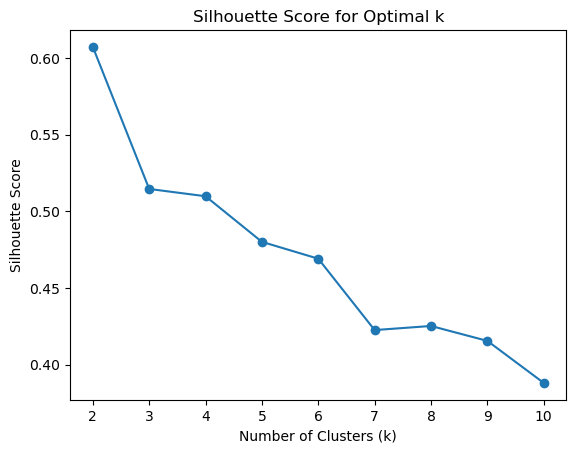

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm_scaled, cluster_labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

         customer_id          R           F            M
Cluster                                                 
0        5011.611961   2.588317   26.200278   338.022538
1        5128.560440   1.241758  134.472527  1819.314264
2        5266.516432  11.826291    8.802817   106.891000


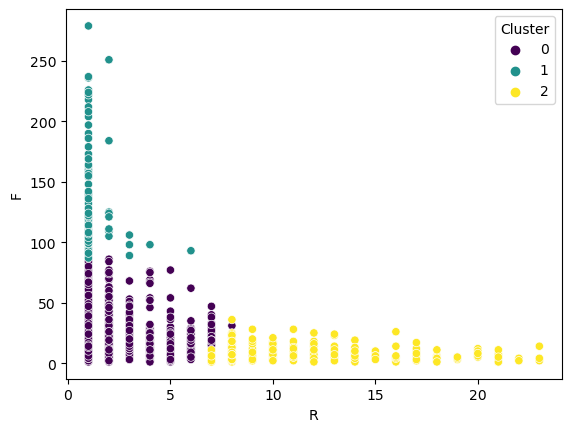

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
customers_RFM['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_means = customers_RFM.groupby('Cluster').mean()
print(cluster_means)


sns.scatterplot(x='R', y='F', hue='Cluster', data=customers_RFM, palette='viridis')
plt.show()

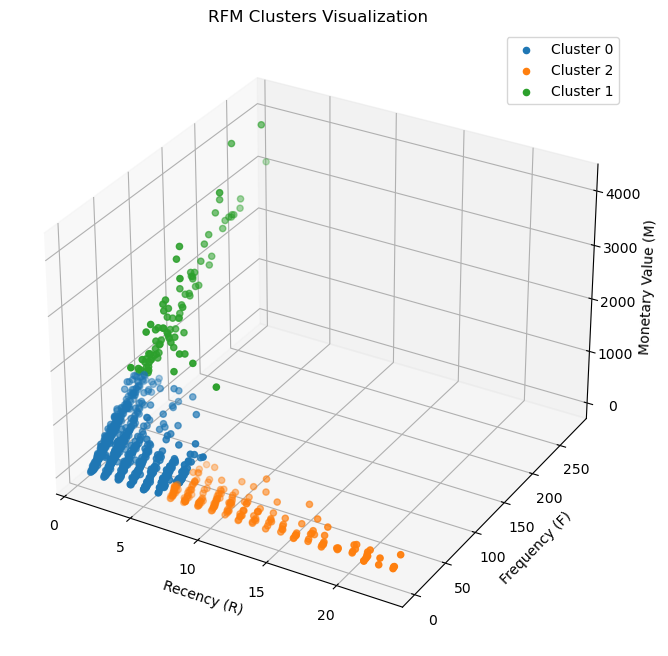

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


for cluster in customers_RFM['Cluster'].unique():
    cluster_data = customers_RFM[customers_RFM['Cluster'] == cluster]
    ax.scatter(cluster_data['R'], cluster_data['F'], cluster_data['M'], label=f'Cluster {cluster}')

ax.set_xlabel('Recency (R)')
ax.set_ylabel('Frequency (F)')
ax.set_zlabel('Monetary Value (M)')
ax.set_title('RFM Clusters Visualization')
ax.legend()

plt.show()

In [ ]:
silhouette_avg = silhouette_score(rfm_scaled, customers_RFM['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5145098376396074


In [ ]:
customers_Seg = customers_RFM
customers_Seg

,customer_id,R,F,M,Cluster
0,9,3,13,174.632,0
1,20,2,36,491.235,0
2,23,8,9,153.709,2
3,25,2,6,74.044,0
4,40,21,7,22.683,2
...,...,...,...,...,...
1018,10234,1,14,193.860,0
1019,10244,2,11,124.419,0
1020,10256,10,2,9.990,2
1021,10258,3,20,233.740,0


In [ ]:
def map_to_segments(cluster):
    if cluster == 2:
        return 'Low Value Customers'
    elif cluster == 1:
        return 'High Value Customers'
    else:
        return 'Average Customers'

customers_Seg['seg-label'] = customers_Seg.apply(lambda x: map_to_segments(x['Cluster']), axis =1)
customers_Seg

,customer_id,R,F,M,Cluster,seg-label
0,9,3,13,174.632,0,Average Customers
1,20,2,36,491.235,0,Average Customers
2,23,8,9,153.709,2,Low Value Customers
3,25,2,6,74.044,0,Average Customers
4,40,21,7,22.683,2,Low Value Customers
...,...,...,...,...,...,...
1018,10234,1,14,193.860,0,Average Customers
1019,10244,2,11,124.419,0,Average Customers
1020,10256,10,2,9.990,2,Low Value Customers
1021,10258,3,20,233.740,0,Average Customers


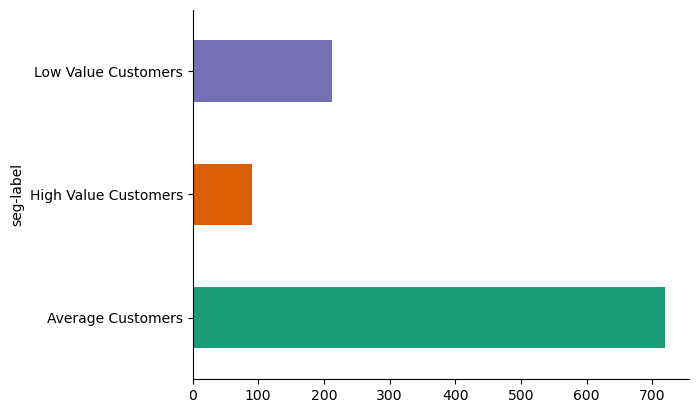

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
customers_Seg.groupby('seg-label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
lowValueC = customers_Seg[(customers_Seg['Cluster'] == 2)]
lowValueC

,customer_id,R,F,M,Cluster,seg-label
2,23,8,9,153.709,2,Low Value Customers
4,40,21,7,22.683,2,Low Value Customers
12,146,11,2,15.217,2,Low Value Customers
31,390,11,8,27.690,2,Low Value Customers
44,476,7,8,147.794,2,Low Value Customers
...,...,...,...,...,...,...
1006,10090,23,4,33.745,2,Low Value Customers
1007,10094,22,2,5.121,2,Low Value Customers
1011,10156,16,6,43.893,2,Low Value Customers
1014,10196,7,6,80.122,2,Low Value Customers


In [ ]:
AvgValueC = customers_Seg[(customers_Seg['Cluster'] == 0)]
AvgValueC

,customer_id,R,F,M,Cluster,seg-label
0,9,3,13,174.632,0,Average Customers
1,20,2,36,491.235,0,Average Customers
3,25,2,6,74.044,0,Average Customers
5,45,8,31,539.668,0,Average Customers
6,57,1,29,380.056,0,Average Customers
...,...,...,...,...,...,...
1017,10230,1,13,148.660,0,Average Customers
1018,10234,1,14,193.860,0,Average Customers
1019,10244,2,11,124.419,0,Average Customers
1021,10258,3,20,233.740,0,Average Customers


In [ ]:
HighValueC = customers_Seg[(customers_Seg['Cluster'] == 1)]
HighValueC

,customer_id,R,F,M,Cluster,seg-label
13,158,3,89,1152.833,1,High Value Customers
78,850,1,218,2681.555,1,High Value Customers
86,896,2,125,1453.207,1,High Value Customers
110,1124,1,158,2127.203,1,High Value Customers
113,1145,1,94,1182.290,1,High Value Customers
...,...,...,...,...,...,...
931,9271,1,64,1335.947,1,High Value Customers
959,9631,1,197,2955.147,1,High Value Customers
968,9728,1,169,1848.683,1,High Value Customers
987,9881,1,108,1333.693,1,High Value Customers


In [ ]:
customers_Seg_sales_info = pd.merge(sales_data, customers_Seg,
                                           on='customer_id', how='inner')
customers_Seg_sales_info

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,R,F,M,Cluster,seg-label
0,9,77,848,19,8.40,2.688,3,3,13,174.632,0,Average Customers
1,9,1346,1013,19,7.05,2.256,3,3,13,174.632,0,Average Customers
2,9,293,848,19,4.80,1.632,3,3,13,174.632,0,Average Customers
3,9,603,848,19,3.69,1.734,3,3,13,174.632,0,Average Customers
4,9,87,848,19,5.34,2.456,3,3,13,174.632,0,Average Customers
...,...,...,...,...,...,...,...,...,...,...,...,...
32945,10274,836,887,6,4.72,1.605,4,7,32,501.992,0,Average Customers
32946,10274,638,626,6,9.45,3.591,3,7,32,501.992,0,Average Customers
32947,10274,835,626,6,10.47,4.397,3,7,32,501.992,0,Average Customers
32948,10274,1107,626,6,8.10,2.673,3,7,32,501.992,0,Average Customers


In [ ]:
customers_Seg_product_info = pd.merge(product_data, customers_Seg_sales_info,
                                           on='product_id', how='inner')
customers_Seg_product_info

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,...,time_id,store_id,store_sales,store_cost,unit_sales,R,F,M,Cluster,seg-label
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,...,617,11,8.55,2.992,3,2,42,586.702,0,Average Customers
1,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,...,998,17,8.55,4.275,3,2,70,932.537,0,Average Customers
2,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,...,890,17,5.70,1.995,2,1,77,1016.416,0,Average Customers
3,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,...,950,19,8.55,2.736,3,3,16,191.343,0,Average Customers
4,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,...,935,4,5.70,2.508,2,2,74,842.222,0,Average Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,0,0,...,514,14,3.24,1.199,2,20,10,33.253,2,Low Value Customers
32946,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,0,0,...,1037,6,4.86,2.381,3,2,11,111.621,0,Average Customers
32947,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,0,0,...,412,3,3.24,1.361,2,1,57,628.691,0,Average Customers
32948,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,0,0,...,864,24,3.24,1.037,2,2,16,232.117,0,Average Customers


In [ ]:
customers_Seg_customer_info = pd.merge(customer_data, customers_Seg,
                                           on='customer_id', how='inner')
customers_Seg_customer_info

,customer_id,account_num,lname,fname,mi,address1,city,state_province,postal_code,country,...,member_card,occupation,houseowner,num_cars_owned,fullname,R,F,M,Cluster,seg-label
0,9,87544797658,Blumberg,Brenda,C.,7560 Trees Drive,Richmond,BC,17256,Canada,...,Normal,Skilled Manual,Y,1,Brenda Blumberg,3,13,174.632,0,Average Customers
1,20,87653979700,Baker,Beverly,NaN,591 Merriewood Drive,Spring Valley,CA,88762,USA,...,Normal,Manual,Y,2,Beverly Baker,2,36,491.235,0,Average Customers
2,23,87678398489,Wyro,Shauna,K.,3114 Notre Dame Ave.,La Jolla,CA,27430,USA,...,Silver,Manual,N,3,Shauna Wyro,8,9,153.709,2,Low Value Customers
3,25,87686740159,Conley,Lin,N.,7814 Milburn Dr.,Haney,BC,65710,Canada,...,Bronze,Professional,N,2,Lin Conley,2,6,74.044,0,Average Customers
4,40,87814209461,Burchett,Phyllis,NaN,475 Santa Maria,Santa Cruz,CA,49192,USA,...,Bronze,Professional,Y,2,Phyllis Burchett,21,7,22.683,2,Low Value Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,10234,86933575868,Zikria,Sharon,L.,9177 Olympic Drive,Beverly Hills,CA,53450,USA,...,Normal,Manual,N,2,Sharon Zikria,1,14,193.860,0,Average Customers
1019,10244,87070695757,Morton,Don,E.,4824 Kirkwood Ct.,Westminster,BC,96502,Canada,...,Silver,Skilled Manual,Y,1,Don Morton,2,11,124.419,0,Average Customers
1020,10256,87227025600,Gibson,Carol,NaN,6417 Mt. Dias Blvd.,Altadena,CA,11902,USA,...,Normal,Manual,Y,2,Carol Gibson,10,2,9.990,2,Low Value Customers
1021,10258,87243612408,Moore,Mark,A.,1117 Diablo View Road,Renton,WA,80006,USA,...,Bronze,Manual,Y,3,Mark Moore,3,20,233.740,0,Average Customers


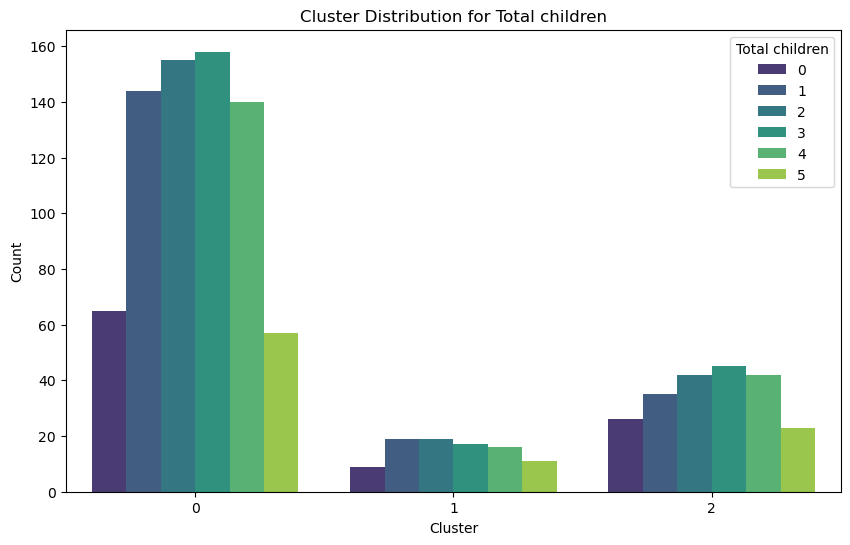

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='total_children', data=customers_Seg_customer_info, palette='viridis')
plt.title('Cluster Distribution for Total children')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Total children', loc='upper right')
plt.show()

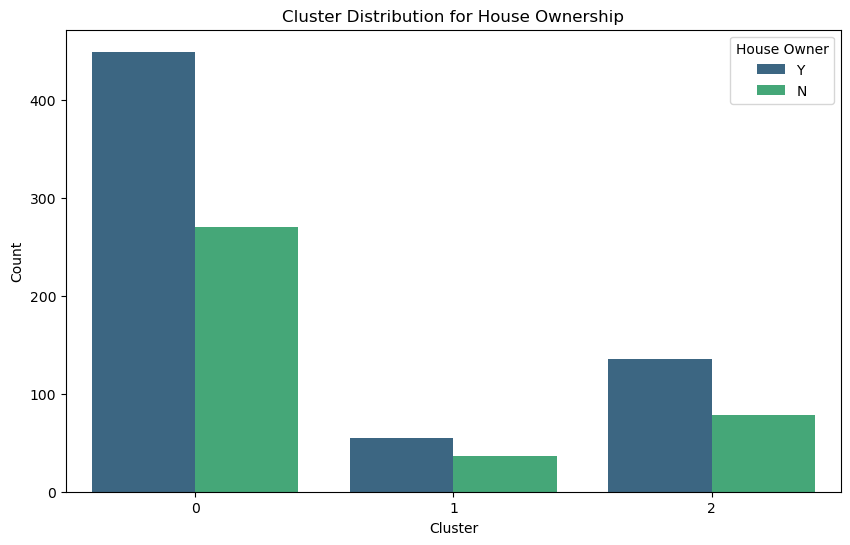

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='houseowner', data=customers_Seg_customer_info, palette='viridis')
plt.title('Cluster Distribution for House Ownership')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='House Owner', loc='upper right')
plt.show()

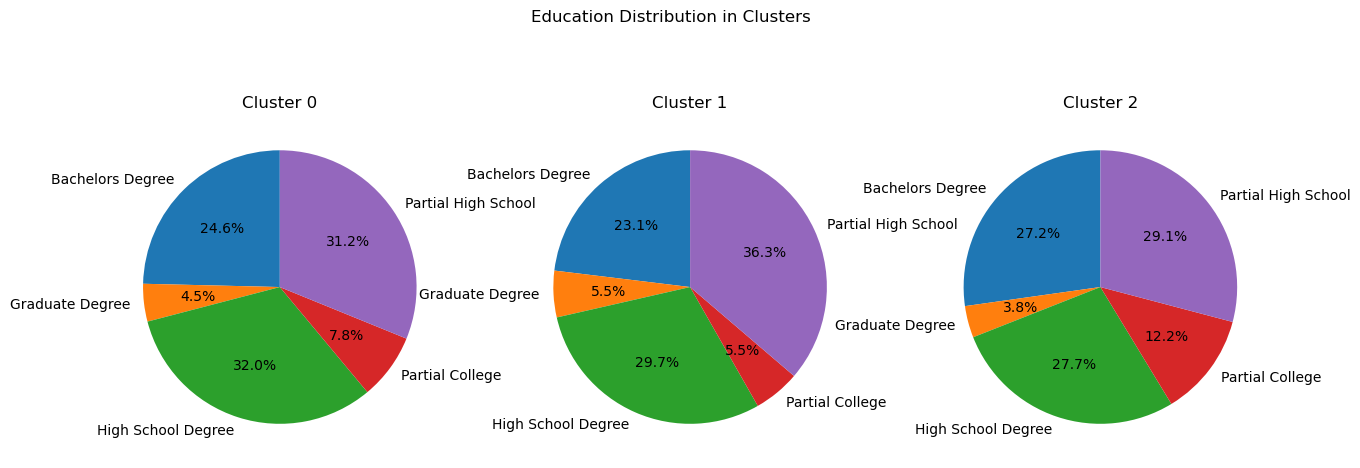

In [ ]:
brand_counts = customers_Seg_customer_info.groupby(['Cluster', 'education']).size().reset_index(name='count')

# Plot pie charts for each cluster
plt.figure(figsize=(15, 5))

for cluster in brand_counts['Cluster'].unique():
    cluster_data = brand_counts[brand_counts['Cluster'] == cluster]
    plt.subplot(1, 3, cluster+1)  # 1 row, 3 columns (adjust as needed)
    plt.pie(cluster_data['count'], labels=cluster_data['education'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Cluster {cluster}')

plt.suptitle('Education Distribution in Clusters', y=1.05)
plt.show()

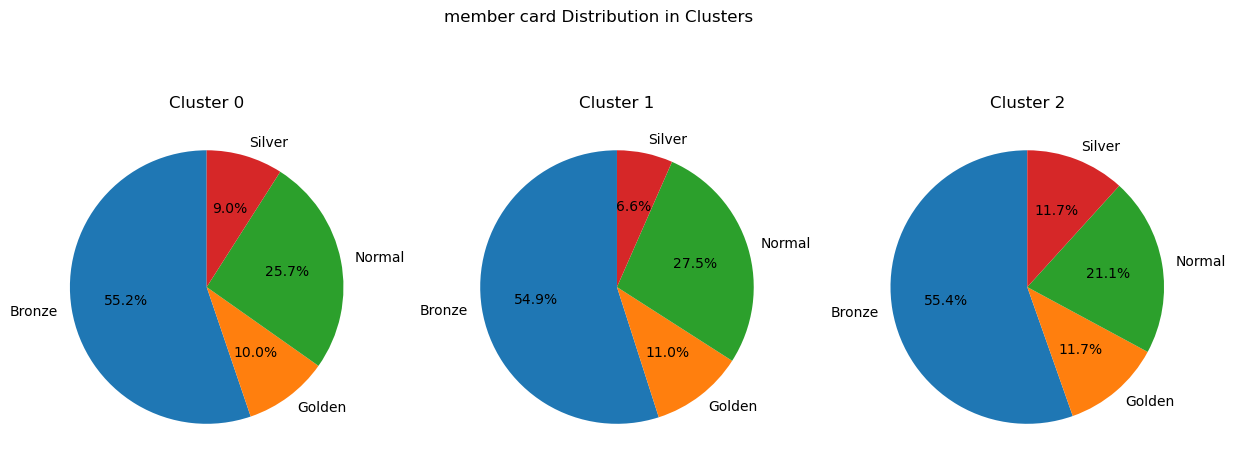

In [ ]:
brand_counts = customers_Seg_customer_info.groupby(['Cluster', 'member_card']).size().reset_index(name='count')

# Plot pie charts for each cluster
plt.figure(figsize=(15, 5))

for cluster in brand_counts['Cluster'].unique():
    cluster_data = brand_counts[brand_counts['Cluster'] == cluster]
    plt.subplot(1, 3, cluster+1)  # 1 row, 3 columns (adjust as needed)
    plt.pie(cluster_data['count'], labels=cluster_data['member_card'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Cluster {cluster}')

plt.suptitle('member card Distribution in Clusters', y=1.05)
plt.show()

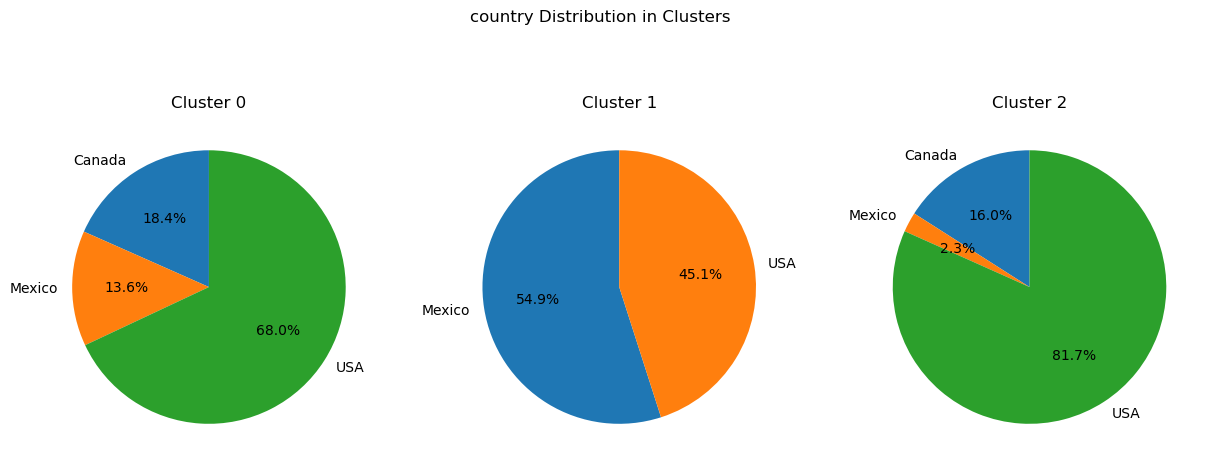

In [ ]:

brand_counts = customers_Seg_customer_info.groupby(['Cluster', 'country']).size().reset_index(name='count')

# Plot pie charts for each cluster
plt.figure(figsize=(15, 5))

for cluster in brand_counts['Cluster'].unique():
    cluster_data = brand_counts[brand_counts['Cluster'] == cluster]
    plt.subplot(1, 3, cluster+1)  # 1 row, 3 columns (adjust as needed)
    plt.pie(cluster_data['count'], labels=cluster_data['country'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Cluster {cluster}')

plt.suptitle('country Distribution in Clusters', y=1.05)
plt.show()

<Figure size 1200x800 with 0 Axes>

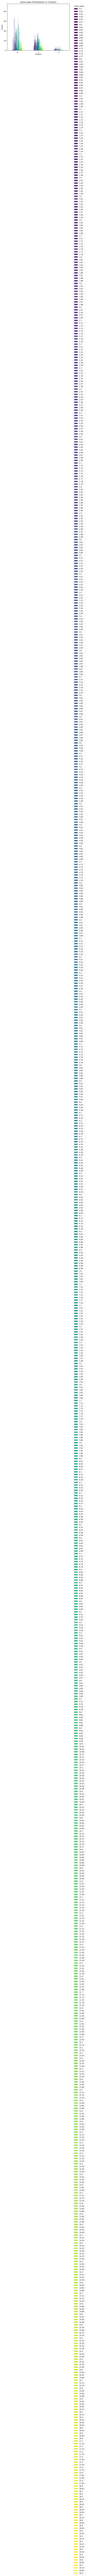

In [ ]:
brand_counts = customers_Seg_product_info.groupby(['Cluster', 'store_sales']).size().reset_index(name='count')

# Pivot the data for easy plotting
pivot_data = brand_counts.pivot(index='Cluster', columns='store_sales', values='count').fillna(0)

# Plot the grouped bar plot
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', colormap='viridis')
plt.title('store sales Distribution in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='store_sales', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
customers_Seg_sales_info2 = customers_Seg_sales_info
customers_Seg_sales_info2

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales,R,F,M,Cluster,seg-label
0,9,77,848,19,8.40,2.688,3,3,13,174.632,0,Average Customers
1,9,1346,1013,19,7.05,2.256,3,3,13,174.632,0,Average Customers
2,9,293,848,19,4.80,1.632,3,3,13,174.632,0,Average Customers
3,9,603,848,19,3.69,1.734,3,3,13,174.632,0,Average Customers
4,9,87,848,19,5.34,2.456,3,3,13,174.632,0,Average Customers
...,...,...,...,...,...,...,...,...,...,...,...,...
32945,10274,836,887,6,4.72,1.605,4,7,32,501.992,0,Average Customers
32946,10274,638,626,6,9.45,3.591,3,7,32,501.992,0,Average Customers
32947,10274,835,626,6,10.47,4.397,3,7,32,501.992,0,Average Customers
32948,10274,1107,626,6,8.10,2.673,3,7,32,501.992,0,Average Customers


In [ ]:
customers_bought = customers_Seg_sales_info2.groupby('customer_id').agg(
    {'product_id' : lambda x: list(pd.Series.unique(x)), 'seg-label' : 'first'}).reset_index()
customers_bought

,customer_id,product_id,seg-label
0,9,"[77, 1346, 293, 603, 87, 573, 4, 163, 978, 963...",Average Customers
1,20,"[1196, 487, 176, 1241, 182, 225, 415, 281, 149...",Average Customers
2,23,"[1281, 1190, 421, 1004, 821, 758, 1370, 1474, ...",Low Value Customers
3,25,"[258, 3, 1218, 48, 707, 264]",Average Customers
4,40,"[340, 1009, 256, 972, 1082, 1492, 317]",Low Value Customers
...,...,...,...
1018,10234,"[1277, 424, 413, 1316, 979, 617, 946, 634, 141...",Average Customers
1019,10244,"[1355, 1234, 1284, 1268, 1299, 679, 623, 1455,...",Average Customers
1020,10256,"[1401, 945]",Low Value Customers
1021,10258,"[181, 700, 730, 471, 28, 1076, 550, 1309, 1465...",Average Customers


In [ ]:
unique_products = customers_bought.set_index('customer_id')['product_id'].tolist()
print(unique_products)

[[77, 1346, 293, 603, 87, 573, 4, 163, 978, 963, 943, 314, 1146], [1196, 487, 176, 1241, 182, 225, 415, 281, 1497, 1031, 1103, 1451, 1413, 59, 1052, 642, 142, 565, 814, 991, 309, 1014, 336, 1168, 364, 1323, 192, 1040, 1507, 161, 204, 1396, 26, 941, 421, 448], [1281, 1190, 421, 1004, 821, 758, 1370, 1474, 405], [258, 3, 1218, 48, 707, 264], [340, 1009, 256, 972, 1082, 1492, 317], [1030, 1437, 528, 618, 215, 467, 755, 572, 611, 944, 1121, 887, 1483, 1443, 400, 637, 1515, 1014, 1482, 1060, 1182, 1409, 910, 960, 987, 507, 1110, 1553, 412, 1187, 418], [181, 1289, 1182, 1112, 1278, 649, 339, 1481, 1344, 489, 1432, 786, 370, 646, 936, 320, 1389, 663, 1206, 253, 929, 1338, 1039, 1002, 286, 506, 241, 562], [1104, 1140, 921, 497, 1037, 1516, 54, 267, 451, 1466, 1184, 528, 1483], [245, 145, 128, 1438, 1372, 1360, 940, 902, 95, 1143, 20, 176, 1155], [1411, 1217, 1210, 1000, 163, 345, 1205, 1195, 162, 711, 812, 934, 729, 47, 240, 1087, 995, 102, 422, 1131, 1090, 873, 1083, 1533, 1383, 1370, 1433, 5

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
a = TransactionEncoder()
a_data = a.fit(unique_products).transform(unique_products)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)
df

,1,2,3,4,5,6,7,8,9,10,...,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfBool = df.astype(bool)
dfBool

,1,2,3,4,5,6,7,8,9,10,...,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1019,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
frequent_itemsets = apriori(dfBool, min_support=0.03, use_colnames=True, verbose=1)
frequent_itemsets

Processing 812 combinations | Sampling itemset size 2


,support,itemsets
0,0.030303,(49)
1,0.030303,(158)
2,0.037146,(264)
3,0.030303,(292)
4,0.031281,(304)
5,0.033236,(332)
6,0.031281,(382)
7,0.031281,(399)
8,0.034213,(410)
9,0.032258,(421)
